# Supermart Grocery Sales - Retail Analysis #

## 📘 Project Summary
A data-driven analysis and machine learning project based on fictional grocery sales data from Tamil Nadu, India. Explored patterns in customer purchases, identified business insights, and built a model to forecast future sales.

## Data Exploration

In [84]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")   

plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [85]:
df.shape

(9994, 11)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [87]:
df.columns.to_list()

['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Order Date',
 'Region',
 'Sales',
 'Discount',
 'Profit',
 'State']

In [88]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [89]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [90]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df['Order Date']

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9989          NaT
9990   2015-12-07
9991   2017-06-06
9992          NaT
9993          NaT
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [91]:
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [92]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11.0,8.0,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11.0,8.0,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6.0,12.0,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10.0,11.0,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10.0,11.0,2016.0


## Data Visualization


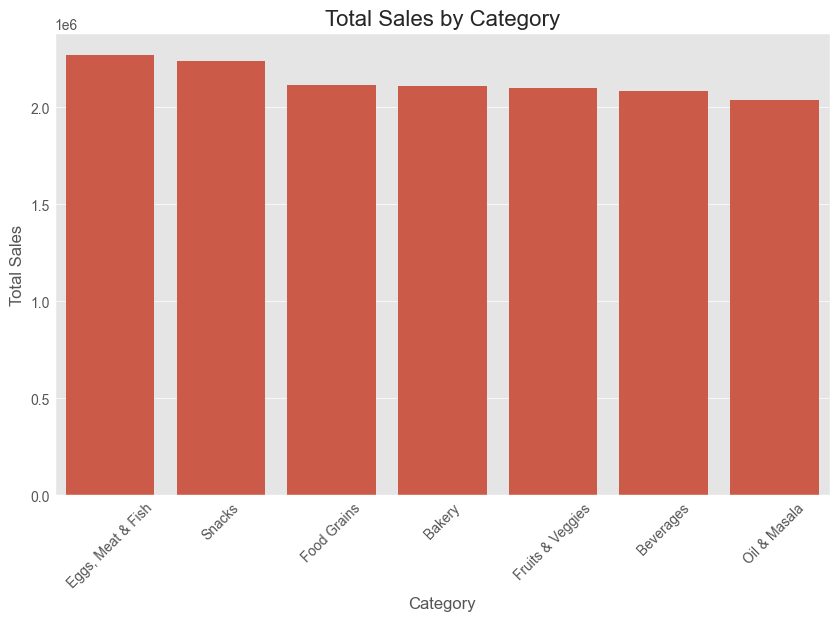

In [93]:
# Group sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values,)
plt.title("Total Sales by Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


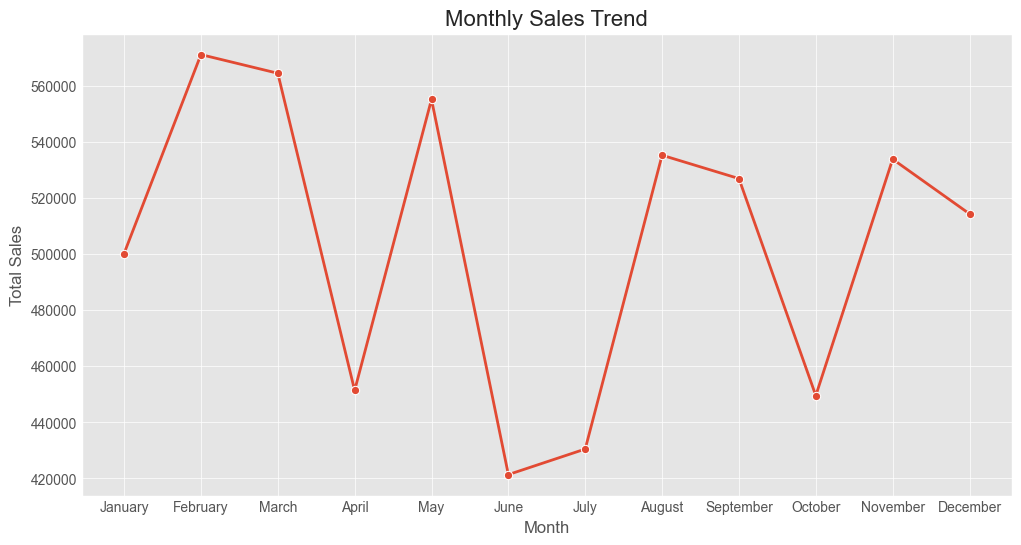

In [94]:
# Monthly sales trend
df['Month'] = df['Order Date'].dt.strftime('%B')

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_sales = df.groupby('Month')['Sales'].sum().reindex(month_order)


plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

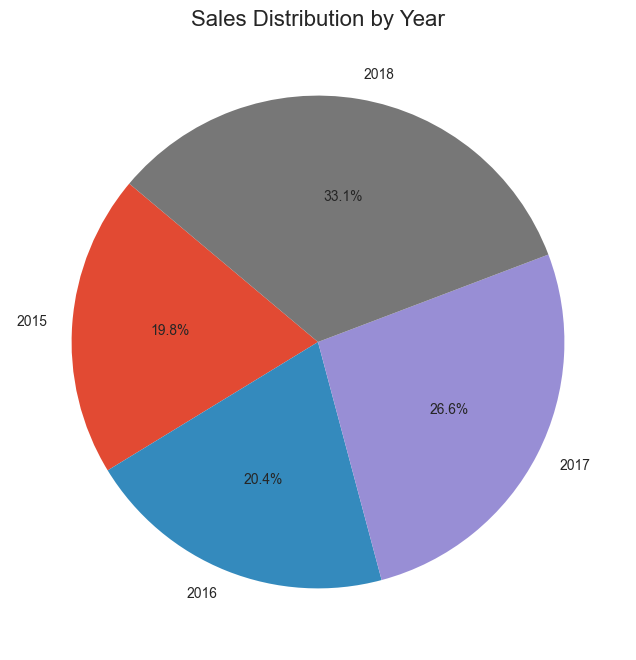

In [95]:
# Sales Distribution by Year
yearly_sales = df.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(8,8))
plt.pie(yearly_sales.values, labels=yearly_sales.index.astype(int), autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Year", fontsize=16)
plt.show()

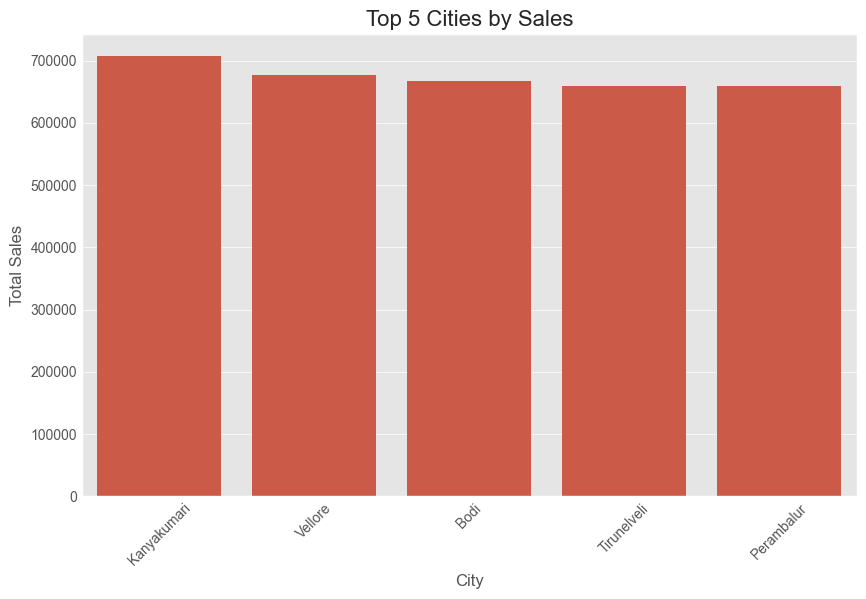

In [96]:
# Group and sort cities by sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("Top 5 Cities by Sales", fontsize=16)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Machine Learning 

In [97]:
from sklearn.preprocessing import LabelEncoder

# Instantiate encoder
le = LabelEncoder()


categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']


for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [98]:

X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])

# Target variable
y = df['Sales']

In [99]:
print("Missing values per feature:", X.isnull().sum())

Missing values per feature: Category           0
Sub Category       0
City               0
Region             0
Discount           0
Profit             0
State              0
Order Day       5952
Order Month     5952
Order Year      5952
Month              0
dtype: int64


In [100]:
# Drop rows with NaN values in X
X = X.dropna()
y = y[X.index] 

In [101]:
# Fill NaN values with mean for numeric columns
X = X.fillna(X.mean(numeric_only=True))

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-squared:", round(r2, 2))

Mean Squared Error: 211449.35
R-squared: 0.37


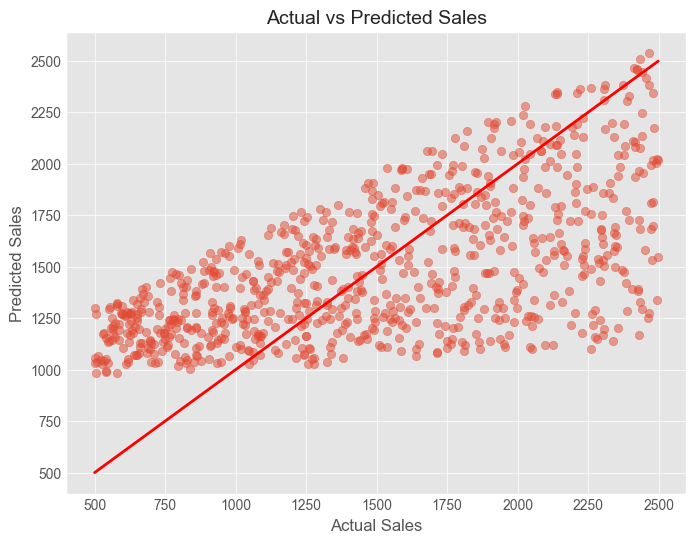

In [104]:
# Plotting Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r-')
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()